In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder as oneHot
from MLP import MLP
from genetic_optimisation import genetic_optimisation as GO

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

W0803 10:32:27.989002 139924034324288 deprecation_wrapper.py:119] From /home/jahan/Documents/algorithms/MLP.py:5: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.



In [2]:
x_train, x_test = x_train.reshape(60000,28*28) / 255.0, x_test.reshape(10000,28*28) / 255.0
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
onehot = oneHot()
onehot.fit(y_train)
y_train = onehot.transform(y_train).toarray()
y_test = onehot.transform(y_test).toarray()

/home/jahan/miniconda3/envs/ml_cpu/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
mlp = MLP(x_train,y_train)
mlp.build(1,10)

True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [4]:
mlp.train(1)

Train on 54000 samples, validate on 6000 samples


W0803 10:32:28.555783 139924034324288 deprecation.py:323] From /home/jahan/miniconda3/envs/ml_cpu/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


54000/54000 [==============================] - 5s 101us/sample - loss: 1.1022 - categorical_accuracy: 0.6165 - val_loss: 0.4099 - val_categorical_accuracy: 0.9060


In [5]:
mlp.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.4534 - categorical_accuracy: 0.8855


0.8855

In [6]:
layers = [1,10]
nodes = [2,100]
go = GO(model=MLP, 
        x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, 
        param_one=layers,
        param_two=nodes,
        epochs=1, generations=5, keep=0.5, size=6)

In [7]:
parameters, metrics, performance = go.train()

[ 7. 90.  8. 15.]
True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 52)                40820     
_________________________________________________________________
dense_4 (Dense)              (None, 52)                2756      
_________________________________________________________________
dropout_1 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 52)                2756      
_________________________________________________________________
dropout_2 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 

10000/10000 [==============================] - 1s 130us/sample - loss: 1.9256 - categorical_accuracy: 0.1893
[ 4.  3.  4. 44.]
True
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_31 (Dense)             (None, 23)                18055     
_________________________________________________________________
dense_32 (Dense)             (None, 23)                552       
_________________________________________________________________
dropout_23 (Dropout)         (None, 23)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 23)                552       
_________________________________________________________________
dropout_24 (Dropout)         (None, 23)                0   

10000/10000 [==============================] - 1s 56us/sample - loss: 2.0342 - categorical_accuracy: 0.2915
[ 4.  3.  7. 75.]
True
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_59 (Dense)             (None, 39)                30615     
_________________________________________________________________
dense_60 (Dense)             (None, 39)                1560      
_________________________________________________________________
dropout_43 (Dropout)         (None, 39)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 39)                1560      
_________________________________________________________________
dropout_44 (Dropout)         (None, 39)                0    

10000/10000 [==============================] - 1s 113us/sample - loss: 1.6922 - categorical_accuracy: 0.3822
[ 8.  2.  9. 88.]
True
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_92 (Dense)             (None, 45)                35325     
_________________________________________________________________
dense_93 (Dense)             (None, 45)                2070      
_________________________________________________________________
dropout_68 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 45)                2070      
_________________________________________________________________
dropout_69 (Dropout)         (None, 45)                0  

10000/10000 [==============================] - 1s 116us/sample - loss: 0.5673 - categorical_accuracy: 0.8267
[ 4. 87.  3. 75.]
True
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_120 (Dense)            (None, 81)                63585     
_________________________________________________________________
dense_121 (Dense)            (None, 81)                6642      
_________________________________________________________________
dropout_90 (Dropout)         (None, 81)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 81)                6642      
_________________________________________________________________
dropout_91 (Dropout)         (None, 81)                0  

10000/10000 [==============================] - 2s 173us/sample - loss: 0.6434 - categorical_accuracy: 0.7798
[ 2. 95.  4. 56.]
True
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_145 (Dense)            (None, 75)                58875     
_________________________________________________________________
dense_146 (Dense)            (None, 75)                5700      
_________________________________________________________________
dropout_109 (Dropout)        (None, 75)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 75)                5700      
_________________________________________________________________
dropout_110 (Dropout)        (None, 75)                0  

10000/10000 [==============================] - 1s 89us/sample - loss: 0.2326 - categorical_accuracy: 0.9328
[ 4. 89.  2. 26.]
True
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_168 (Dense)            (None, 57)                44745     
_________________________________________________________________
dense_169 (Dense)            (None, 57)                3306      
_________________________________________________________________
dropout_124 (Dropout)        (None, 57)                0         
_________________________________________________________________
dense_170 (Dense)            (None, 57)                3306      
_________________________________________________________________
dropout_125 (Dropout)        (None, 57)                0   

10000/10000 [==============================] - 1s 93us/sample - loss: 0.2561 - categorical_accuracy: 0.9272
[ 4. 87.  4. 75.]
True
Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_191 (Dense)            (None, 81)                63585     
_________________________________________________________________
dense_192 (Dense)            (None, 81)                6642      
_________________________________________________________________
dropout_139 (Dropout)        (None, 81)                0         
_________________________________________________________________
dense_193 (Dense)            (None, 81)                6642      
_________________________________________________________________
dropout_140 (Dropout)        (None, 81)                0   

10000/10000 [==============================] - 1s 123us/sample - loss: 1.0083 - categorical_accuracy: 0.6653
[ 3. 74.  8. 94.]
True
Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_219 (Dense)            (None, 84)                65940     
_________________________________________________________________
dense_220 (Dense)            (None, 84)                7140      
_________________________________________________________________
dropout_159 (Dropout)        (None, 84)                0         
_________________________________________________________________
dense_221 (Dense)            (None, 84)                7140      
_________________________________________________________________
dropout_160 (Dropout)        (None, 84)                0  

In [8]:
performance

array([[0.71219999, 0.9339    ],
       [0.59740001, 0.93910003],
       [0.82669997, 0.93449998],
       [0.92869997, 0.93279999],
       [0.921     , 0.93129998]])

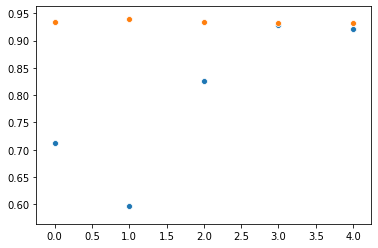

In [10]:
sns.scatterplot(np.arange(5),performance[:,0])
sns.scatterplot(np.arange(5),performance[:,1])